<a href="https://colab.research.google.com/github/legalnlp21/legalnlp/blob/main/demo/BERT/BERT_TUTORIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BERT

**Autores**: 
- Gabriel Caiaffa (gabrielcaiaffa08@gmail.com)
- Kauê Capellato J. Parreira (kauecapellatojp@gmail.com)


# Inicialização

In [ ]:
# inicializando a seed e importando algumas bibliotecas
random_seed=42

import numpy as np
import random

np.random.seed(random_seed)
random.seed(random_seed)

In [ ]:
import IPython
from IPython.display import Image
from IPython.display import clear_output

In [ ]:
# função para exibir as imagens
def show(link,width):
   return IPython.display.Image(data = link, width = width)

# Introdução


Com o amadurecimento das Redes Neurais Recorrentes (RNNs, em inglês), veio o surgimento e desenvolvimento de modelos de processamento de linguagem natural (PLN) mais complexos, capazes de compreender cada vez mais sentenças e seus contextos em um conjunto de textos. Como exemplo de uma aplicação dessas redes, temos o **BERT**, que é um modelo de aprendizado profundo bastante utilizado em diversas tarefas de processamento de linguagem natural.

BERT significa **B**idirectional **E**ncoder **R**epresentations for **T**ransformers e foi desenvolvido por pesquisadores do $\textit{Google AI Language}$ em 2018 e apresentado ao público em 2019, obtendo resultados espetaculares, conforme seu artigo original [[1]](https://arxiv.org/pdf/1810.04805.pdf). Além disso, os códigos do modelo também foram liberados pela equipe e podem ser encontrados neste [Github](https://github.com/google-research/bert).

Sendo utilizado ainda como inspiração em diversas arquiteturas de PLN, formas de treinamento e modelos de linguagem natural, como XLNet, ERNIE2.0, RoBERTa, entre outros.

A parte teórica foi inspirada conforme apresentado no artigo original [[1]](https://arxiv.org/pdf/1810.04805.pdf), assim como em [[2]](https://arxiv.org/pdf/1706.03762.pdf), [[3]]( https://nlp.stanford.edu/seminar/details/jdevlin.pdf), [[4]](https://jalammar.github.io/illustrated-bert/), [[5]](https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270) e demonstrações dadas em [[6]](https://colab.research.google.com/drive/1pTuQhug6Dhl9XalKB0zUGf4FIdYFlpcX#scrollTo=EKOTlwcmxmej) e [[7]](https://mccormickml.com/2020/03/10/question-answering-with-a-fine-tuned-BERT/).

##O que é o BERT e como funciona

O que faz o BERT ser um modelo que se destaca é o fato dele utilizar um treinamento bidirecional do Transformer, que é um tipo de mecanismo de atenção muito efieciente que aprende as relações entre as componentes de um determinado texto.

Os Transformers funcionam com dois mecanismos: o $\textit{encoder}$ e o $\textit{decoder}$. Basicamente, o encoder funciona transformando o input recebido em contexto e o decoder funciona transformando esse contexto em algum outro objetivo, como por exemplo a tradução para uma outra língua.

Para mais informações sobre os Tranformers, leia o artigo original em que foi apresentado [[2]](https://arxiv.org/pdf/1706.03762.pdf).


Diferentemente dos modelos unidirecionais baseados em "contexto livre", como é o caso do $\textit{word2vec}$, gerando um $\textit{embedding}$ (representação do espaço das palavras no espaço real) igual para uma determinada palavra independentemente do seu contexto, o BERT, por ser um modelo bidirecional, consegue extrair o significado da palavra em cada contexto, por isso é chamado também de um "modelo contextual".

Para exemplificar o parágrafo acima, pense na palavra "banco". Nos modelos livres de contexto, essa palavra teria a mesma representação independentemente do seu contexto, embora banco representando uma agência bancária é diferente do banco de uma praça, por exemplo. Por sua vez, os modelos baseados em contexto, identificam cada palavra em seu contexto.


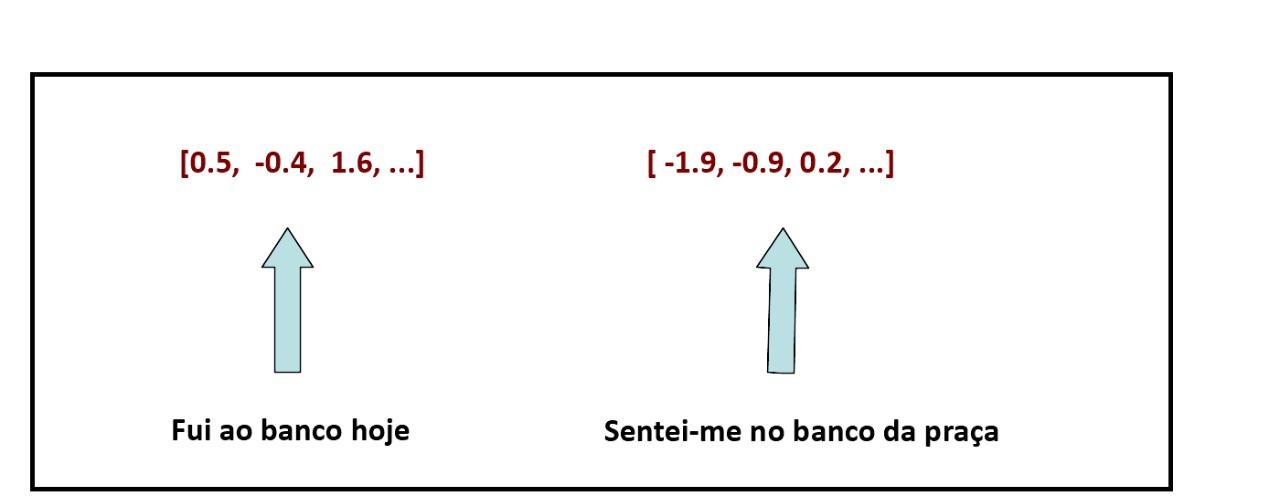

In [ ]:
show('https://raw.githubusercontent.com/legalnlp21/legalnlp/b7e2fcd4c4065bd1599f5ff0987d9581fb667d4c/demo/BERT/notebook_images/image1.jpg',600)

Fonte: Imagem adaptada de [[3]](https://nlp.stanford.edu/seminar/details/jdevlin.pdf)

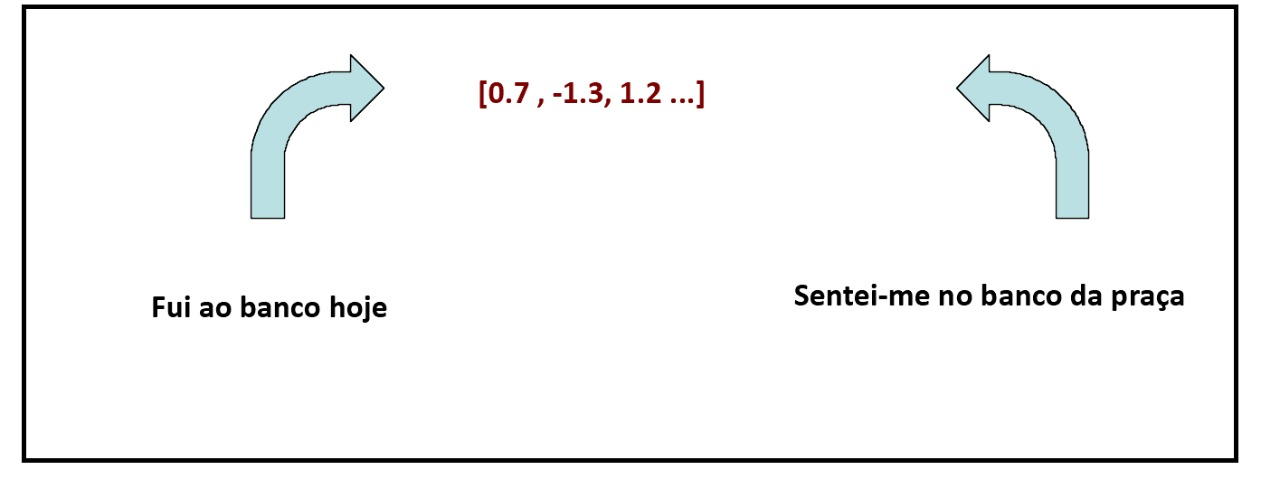

In [ ]:
show('https://raw.githubusercontent.com/legalnlp21/legalnlp/main/demo/BERT/notebook_images/image2.jpg',600)

Fonte: Imagem adaptada de [[3]](https://nlp.stanford.edu/seminar/details/jdevlin.pdf)

Além disso, o BERT foi treinado utilizando uma enorme quantidade de dados não rotulados da Wikipedia (cerca de 2,5 bilhões de palavras) e em corpus de livros (cerca de 800 milhões de palavras).

Agora veremos brevemente a arquitetura desse modelo.

##Arquitetura

Quanto à arquitetura, o BERT possui dois tipos, de acordo com o artigo citado acima: o Base e o Large. As diferenças estão listadas abaixo:

**BERTBASE:** 

  * L = 12 \
  * H = 768 \
  * A = 12 \
  * Total de Parâmetros = 110 milhões

**BERTLARGE:**

  * L = 24 \
  * H = 1024 \
  * A = 16 \
  * Total de Parâmetros = 340 milhões

\
**Onde**:\
    L = Número de camadas (Blocos Transformer)\
    H = Quantidade de unidades na rede neural\
    A = Cabeças de auto-atenção

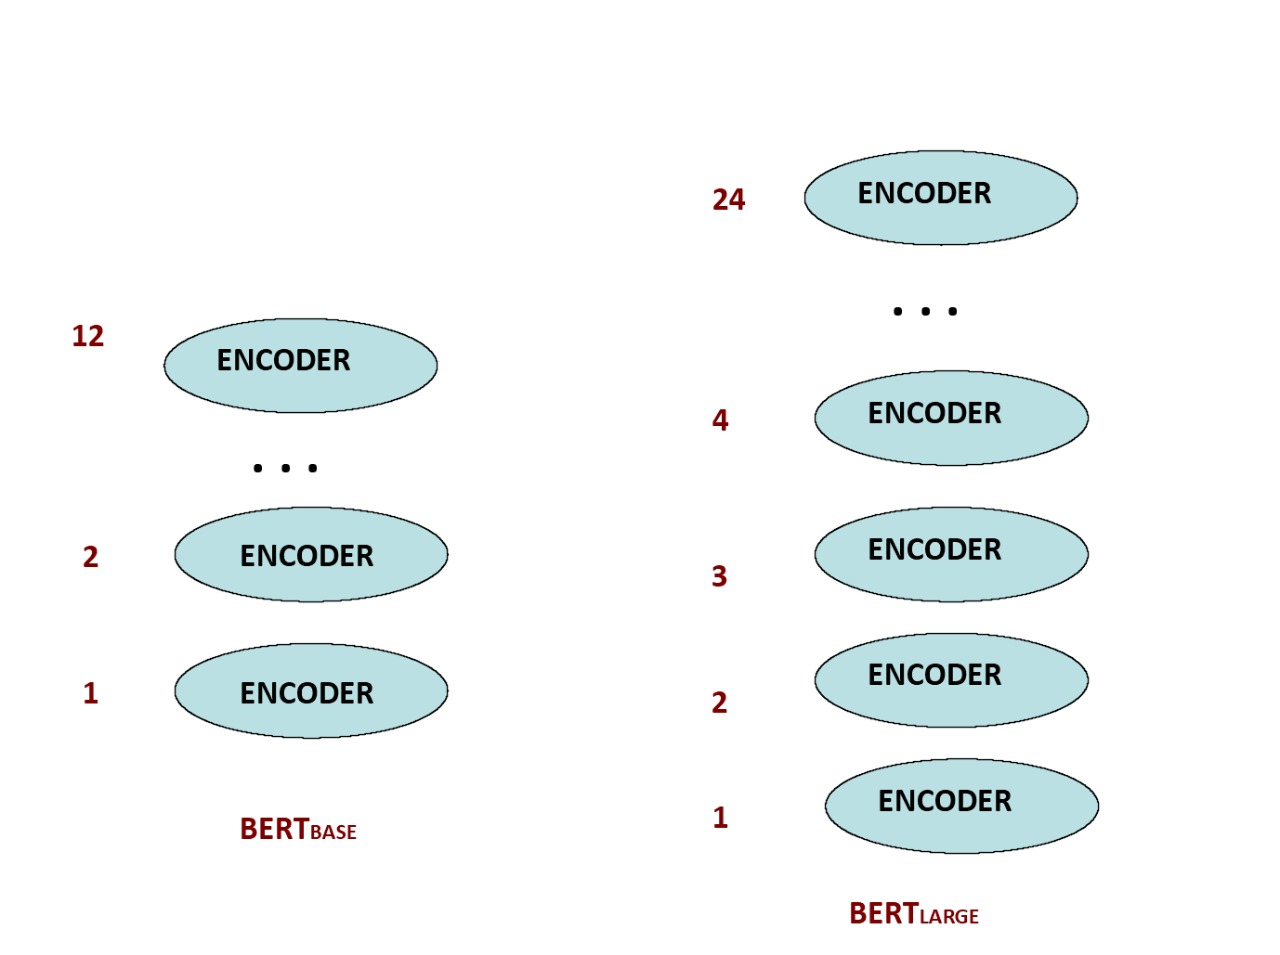

In [ ]:
show('https://raw.githubusercontent.com/legalnlp21/legalnlp/main/demo/BERT/notebook_images/bert1.jpg',600)

Fonte: Imagem adaptada de [[4]](https://jalammar.github.io/illustrated-bert/)

### Entrada do Modelo

A entrada do modelo pode ser composta por uma sentença ou por um par de sentenças, com tamanho máximo suportado pelo modelo de 512 tokens. O BERT utiliza a tokenização WordPiece.

O primeiro token de entrada é sempre marcado como [CLS], que é um token especial de classificação. Quando duas frases entram no modelo, elas podem ser diferenciadas por meio do token [SEP].

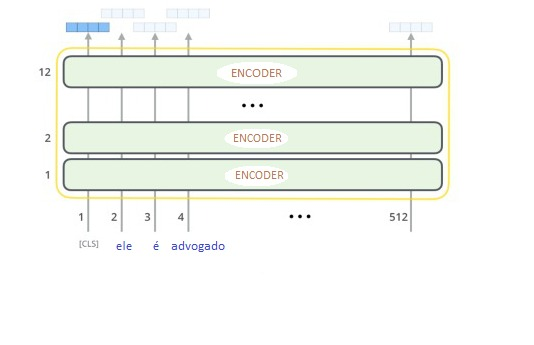

In [ ]:
show('https://raw.githubusercontent.com/legalnlp21/legalnlp/main/demo/BERT/notebook_images/enconder1.jpg',600)

Fonte: Imagem adaptada de [[4]](https://jalammar.github.io/illustrated-bert/)

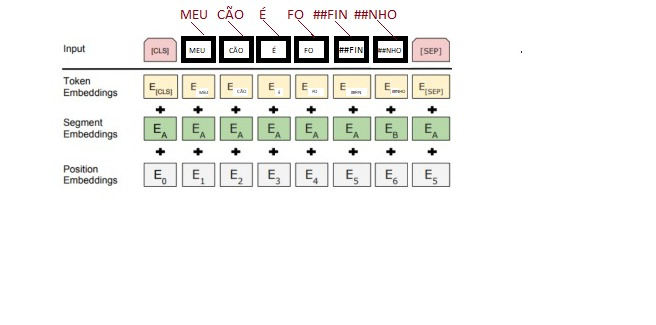

In [ ]:
show('https://raw.githubusercontent.com/legalnlp21/legalnlp/main/demo/BERT/notebook_images/enconder2.jpg',600)

Fonte: Imagem adaptada de [[5]](https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270)

Para um dado token de entrada, sua forma é dada por um embedding da soma de 3 outros tokens, como visto na figura acima. São eles:

* **Position Embeddings**: O modelo aprende e utiliza embeddings de posição para expressar a posição/ordem das palavras na sentença. 

* **Segment Embeddings**: O BERT recebe pares de sentenças e utiliza embeddings para o modelo aprender e conseguir distingui-las.  

* **Token Embeddings**: São embeddings específicos, aprendidos através do vocabulário do WordPiece.

### Saída do Modelo

Já a saída do modelo consiste em um vetor de tamanho $\textit{hidden_size}$, que no caso do BERT BASE é 768 para cada token de entrada, que também pode ser visto como uma representação vetorial real daquele determinado token.

## Pré Treinamento

O BERT possui 2 estratégias de pré treinamento: Masked Language Model (MLM) e Next Sentence Prediction (NSP).

### **Masked LM (MLM)**

Nessa abordagem, são mascarados ([MASK]) aleatoriamente $15\%$ dos tokens de entrada e então feita a predição apenas desses tokens mascarados por meio de uma função $\textit{softmax}$. Dentro dos $15\%$ dos tokens aleatoriamente selecionados: 

\\

* $80\%$ das vezes é sustituído com [MASK]:

$\quad\quad\quad$ Fui ao banco $\rightarrow$ Fui ao [MASK]

\\

* $10\%$ das vezes é susbtituído com alguma palavra aleatória:

$\quad\quad\quad$ Fui ao banco $\rightarrow$ Fui ao chovendo

\\

* $10\%$ das vezes é mantido a mesma palavra

$\quad\quad\quad$ Fui ao banco $\rightarrow$ Fui ao banco

Exemplo:

Sequência de entrada: O homem [MASK] a loja com [MASK] cachorro

Sequência alvo:                      **foi**     e          **seu**

### **Next Sentence Prediction (NSP)**

Essa estratégia, por sua vez, se caracteriza por focar nas relações entre as sentenças, pré-treinando assim para uma tarefa de predição de próximas sentenças em que são possíveis apenas 2 resultados, "IsNext", caso a sentença B seja a próxima sentença de A ou "NotNext" caso contrário.

Para essa tarefa, os dados de treino consistem de $50\%$ dos dados rotulados como "IsNext" e os outros $50\%$ como "NotNext", e é aplicada em conjunto com a estratégia de Masked ML explicada acima.

Exemplos:

Input = [CLS] o homem [MASK] a loja [SEP]

ele comprou uma garrafa de [MASK] leite [SEP]

Label = IsNext

\

Input = [CLS] o homem [MASK] a loja [SEP]

o [MASK] está muito ensolarado [SEP]

Label = NotNext


# Utilizando o BERT: **Fine-Tuning** ou **Feature Extraction**

O modelo BERT pode ser utilizado por meio da **Extração de Features, técnica que foi utilizada nesse notebook** ou por meio da técnica chamada Fine-Tuning.

Na **Extração de Features**, o modelo pré-treinado do Bert é usado para extrair features da base de dados em questão, de tal forma que essas possam ser usadas no treinamento de modelos com regressão Logística, Random Forest entre outros.

Com o **Fine-Tuning**, é possível pegarmos o nosso modelo pré treinado e usar uma outra base de dados deseja para treinarmos mais parâmetros baseados baseados na tarefa em que desejamos executar, seja ela classificação de textos ou responder perguntas por exemplo. No Fine-Tuning,são usados modelos contidos no próprio pacote do BERT para execução de tarefas, diferentemente da extração de features, em que usamos modelos externos ao desse pacote.Você pode procurar mais a respeito nos seguintes links:

(Classificação de Pares de Sentenças) [[6]](https://colab.research.google.com/drive/1pTuQhug6Dhl9XalKB0zUGf4FIdYFlpcX#scrollTo=9cQNvaZ9bnyy): É semelhante ao processo de Next Sentence Prediction (NSP), adicionando uma camada de classificação no topo do output referente ao token [CLS] retornando uma distribuição de probabilidades calculadas por uma função $\textit{softmax}$  

Tarefa de responder perguntas: Essa é uma tarefa de predição [[7]](https://mccormickml.com/2020/03/10/question-answering-with-a-fine-tuned-BERT/). O modelo recebe uma pergunta, que atua como a primeira sentença e um parágrafo contendo o contexto relacionado a pergunta, atuando como a segunda sentença. É feito então o produto escalar da forma final do embedding de cada token com um vetor de pesos, sendo aplicado em uma função de ativação para retornar uma distribuição de probabilidade.

#Mão na Massa

## Carregando os Dados

Instalando as bibliotecas necessárias:

In [ ]:
!pip install unidecode
!pip install ftfy
!pip install transformers==4.2.2
!pip install pyreadr
!pip install git+https://github.com/legalnlp21/legalnlp
clear_output()

Aqui vamos importar algumas bibliotecas que serão muito úteis para frente!

In [ ]:
# manipulação numérica e de dataframes
import numpy as np
import pandas as pd

# gráficos e ajustes visuais
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
from tqdm import tqdm

# pré-processamento de textos e lidar com variáveis categóricas, modelos e métricas 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# tratamento de textos 
import unidecode
import re
import ftfy

In [ ]:
# Code for get data from github
data=pd.read_csv('https://raw.githubusercontent.com/legalnlp21/legalnlp/main/demo/data_base.csv')
data.drop(columns=['Unnamed: 0'],inplace=True)
data.dropna(inplace=True)

## Breve exploração na base de dados

Antes de aplicar os modelos, vale a pena dar uma explorada nos dados que estamos trabalhando. Primeiramente, qual o tamanho desse conjunto de dados?

In [ ]:
print("Quantidade de linhas: ", data.shape[0])
print("Quantidade de colunas: ", data.shape[1])

Quantidade de linhas:  6449
Quantidade de colunas:  2


Vamos visualizar uma pequena amostra desses dados:

In [ ]:
# amostra de tamanho 5
data.sample(5)

,text,label
1726,Certidão de Publicação Expedida Relação :0325/...,H:Suspenso
2963,Certidão de Objeto e Pé Expedida Certidão - Ob...,H:Ativo
4761,Tipo do Movimento:Recebidos os autos,H:Ativo
4264,Tipo do Movimento:Arquivamento Tipo de arquiva...,H:Arquivado
5154,Petição Juntada Juntada a petição diversa - Ti...,H:Ativo


Vamos verificar se tem algum valor faltante nas colunas:

In [ ]:
# valores nas colunas faltante
print(f'Total de: {data["text"].isna().sum()} textos vazios')
print(f'Total de: {data["label"].isna().sum()} classes vazias')

Total de: 0 textos vazios
Total de: 0 classes vazias


Aqui um gráfico de como os rótulos da coluna "label" estão distribuídos:

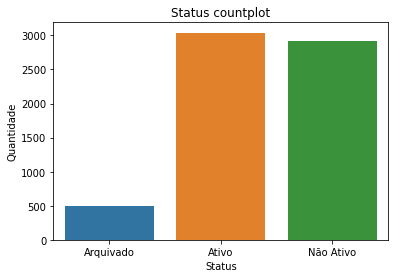

In [ ]:
# countplot das labels
sns.countplot(x = data['label'])

plt.xticks(np.arange(0, 3, step = 1), ['Arquivado', 'Ativo', 'Não Ativo'])
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.title('Status countplot')

plt.show()

E em frequências relativas:

In [ ]:
# Frequência das labels
freq = pd.DataFrame(data['label'].value_counts()/len(data))
freq

,label
H:Arquivado,0.471391
H:Ativo,0.452318
H:Suspenso,0.076291


##Limpando os textos

Aqui vamos aplicar a função abaixo (clean_bert), que recebe um texto como argumento e realiza a limpeza desse texto, cuidando de Unicodes ruins (caracteres estranhos) por meio do atributo fix_text da biblioteca [ftfy: fixes text for you](https://ftfy.readthedocs.io/en/latest/) e fazendo substituições de determinados caracteres para outros específicos.

Com a função clean_bert, aplicamos na coluna de textos do nosso conjunto de dados:

In [ ]:
from legalnlp.clean_functions import clean_bert
data['text'] = data['text'].apply(lambda x:clean_bert(x))
data

,text,label
0,Início da Execução Juntado 0008003-11.2018.8.2...,H:Suspenso
1,Ofício Requisitório - Comunicação - Protocolo ...,H:Arquivado
2,Arquivado Provisoriamente aguardando manifestação,H:Suspenso
3,Petição Juntada Juntada a petição diversa - Ti...,H:Ativo
4,Remetidos os Autos para o Arquivo Geral – Devo...,H:Arquivado
...,...,...
6444,Remetidos os Autos para o Arquivo Geral – Devo...,H:Suspenso
6445,Certidão de Trânsito em Julgado com Baixa Expe...,H:Arquivado
6446,Petição Juntada Nº Protocolo: WSCB.19.70085805...,H:Ativo
6447,Remetidos os Autos para o Tribunal de Justiça/...,H:Ativo


Após a limpeza dos dados, vamos dar uma olhada em alguns exemplos:

In [ ]:
str(data.loc[3, 'text'])

'Petição Juntada Juntada a petição diversa - Tipo: Petição Intermediária em Procedimento Comum Cível - Número: 80031 - Protocolo: FGRU19000140154 - Complemento: autor, expedição de ofício.'

In [ ]:
str(data.loc[1278, 'text'])

'Certidão de Cartório Expedida Certifico e dou fé que foram interpostos 2 (dois) incidentes digitais para expedição de ofício requisitório sendo 1(um) referente a ORPV e 1 (um) referente a Precatório, os quais encontram-se aguardando análise. Nada Mais.'

#Aplicando o Label Enconder para deixar o target com valores númericos

Agora, com os textos limpos, vamos ver brevemente como lidar com as variáveis categóricas através do LabelEnconder: 

In [ ]:
encoder = LabelEncoder()
encoder.fit(data['label'])
data['encoded'] = encoder.transform(data['label'])
data

,text,label,encoded
0,Início da Execução Juntado 0008003-11.2018.8.2...,H:Suspenso,2
1,Ofício Requisitório - Comunicação - Protocolo ...,H:Arquivado,0
2,Arquivado Provisoriamente aguardando manifestação,H:Suspenso,2
3,Petição Juntada Juntada a petição diversa - Ti...,H:Ativo,1
4,Remetidos os Autos para o Arquivo Geral – Devo...,H:Arquivado,0
...,...,...,...
6444,Remetidos os Autos para o Arquivo Geral – Devo...,H:Suspenso,2
6445,Certidão de Trânsito em Julgado com Baixa Expe...,H:Arquivado,0
6446,Petição Juntada Nº Protocolo: WSCB.19.70085805...,H:Ativo,1
6447,Remetidos os Autos para o Tribunal de Justiça/...,H:Ativo,1


A coluna 'encoded' representa a forma que os elementos da coluna 'label' foram transformados em variáveis numéricas, como temos 3 classes, cada uma recebeu um valor 0, 1 ou 2, como podemos ver abaixo:

In [ ]:
data.loc[[0, 1, 3], ['label', 'encoded']]

,label,encoded
0,H:Suspenso,2
1,H:Arquivado,0
5,H:Arquivado,0


#Aplicando o tokenizador

O processo de tokenização é o processo de divisão do texto a fim de identificarmos as diferentes palavras das quais ele é formado. No caso do BERT, temos um tokenizador próprio que além de focar na identificação de cada palavra do textos, também há um processo de reconhecimento de palavras que não estão no nosso vocabulário propriamente dito, o que é feito por meio da divisão dessas palavras na tokenização, de tal forma que um palavra pode gerar mais de um token. Dessa maneira, o modelo pode aprender as partes dessa palavra e baseado no contexto em que ela está inserada e no contexto de outras palavras que possuam tokens em comum com ela é possível "aprender seu significado".

In [ ]:
import pickle
import os
import copy 

import torch
import torch.nn as nn
import torch.utils.data as tdata
import torch.optim as optim
import transformers
from transformers import AutoModel, AutoTokenizer, AutoConfig
from transformers import BertForPreTraining, BertModel, BertTokenizer, BertForMaskedLM, BertForNextSentencePrediction, BertForQuestionAnswering

torch.cuda.is_available()

True

In [ ]:
# verificando se tem cuda disponível
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
device = torch.device('cuda:0')

## Carregando o Tokenizador e o modelo pré treinado

Aqui vamos criar duas variáveis que servirão como o tokenizador e o modelo BERT que foi pré-treinado. 

In [ ]:
from legalnlp.get_premodel import *
# Fazendo o download do modelo pre-treinado BERTikal e o seu tokenizador
get_premodel('bert')

True

In [ ]:
# Caso esteja usando o Google Colab, não esqueça de ligar a GPU para o ambiente de execução
%%time

bert_model =  BertModel.from_pretrained('/content/BERTikal/').to(device)
bert_tokenizer = BertTokenizer.from_pretrained('/content/BERTikal/vocab.txt', do_lower_case=False)

clear_output()

CPU times: user 3.38 s, sys: 1.18 s, total: 4.56 s
Wall time: 4.55 s


Aqui as configurações do modelo:

In [ ]:
# configuração do BERT
bert_model.config

BertConfig {
  "_name_or_path": "/content/BERTikal/",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "directionality": "bidi",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.2.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 29794
}

# Usando o tokenizador

Nessa seção veremos como o tokenizador importado acima funciona com alguns exemplos, relacionando com a teoria apresentada no começo desse tutorial.

In [ ]:
# Exemplo 1
print(bert_tokenizer.tokenize('Example to test the text tokenizer'))
print()

# Exemplo 2
print(bert_tokenizer.encode('Another example with the tokenizer'))
print(bert_tokenizer.decode(bert_tokenizer.encode('Another example with the tokenizer')))
print()

# Exemplo 3
tokens = bert_tokenizer.tokenize("This is a sample text to test the tokenizer.")
print(bert_tokenizer.convert_tokens_to_ids(tokens))
print(bert_tokenizer.decode(bert_tokenizer.convert_tokens_to_ids(tokens)))

['Ex', '##amp', '##le', 'to', 'test', 'the', 'tex', '##t', 'to', '##ken', '##ize', '##r']

[101, 7181, 5238, 11367, 3066, 10125, 1621, 374, 8110, 15134, 22282, 102]
[CLS] Another example with the tokenizer [SEP]

[16989, 847, 123, 5748, 3066, 4509, 22286, 374, 15606, 1621, 374, 8110, 15134, 22282, 119]
This is a sample text to test the tokenizer.


In [ ]:
bert_tokenizer.convert_tokens_to_ids(['[CLS]', '[SEP]'])

[101, 102]

In [ ]:
# Tamaho do vocabulário
print("Vocab size: ", bert_tokenizer.vocab_size)

Vocab size:  29794


In [ ]:
bert = data['text'].apply(lambda x: bert_tokenizer.encode(x, add_special_tokens=True,max_length=512, truncation = True))
print('Max sentence length: ', max([len(sen) for sen in bert]))

Max sentence length:  512


# Transformando nossos dados em tensores

In [ ]:
# Fazendo a padronização dos textos
wrapper = textwrap.TextWrapper()
data_text = list(data['text'])

for text in range(len(data_text[:4])):
  print(f'{wrapper.fill(data_text[text])}')
  print()

Início da Execução Juntado 0008003-11.2018.8.26.0002 - Cumprimento de
sentença

Ofício Requisitório - Comunicação - Protocolo Eletrônico - DEPRE

Arquivado Provisoriamente aguardando manifestação

Petição Juntada Juntada a petição diversa - Tipo: Petição
Intermediária em Procedimento Comum Cível - Número: 80031 - Protocolo:
FGRU19000140154 - Complemento: autor, expedição de ofício.



In [ ]:
# Aplicando o bert_tokenizer em nosso dataset com um comprimento máximo de 512 tokens
encoded_inputs = bert_tokenizer(data_text, padding=True, truncation=True, max_length=512, return_tensors="pt")


#Agora temos nossos encoded_input em um dicionário com 3 chaves
encoded_inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
#Visualiando o primeiro texto após a aplicação do tokenizador
print(encoded_inputs['input_ids'][0])

print()

# Mostrando o mesmo texto decodificado 
print(wrapper.fill(bert_tokenizer.decode(encoded_inputs['input_ids'][0])))

tensor([  101,  1308,   826,   180,  9354,   182, 12661,   243,  6324, 21702,
        22335,   118,  1433,   119,  6437,   119,  1015,   119,  2633,   119,
         6324, 22313,   118,  2887,   350,  3551,   125, 12385,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0, 

In [ ]:
# Enviando os tensores para para a GPU
input_ids = encoded_inputs['input_ids'].to(device)

In [ ]:
# Criando o nosso vetor de features 
features = []

# Aplicando o modelo pré-treinado em cada frase e adicionando-o ao nosso vetor

for i in tqdm(range(len(data_text))):

    with torch.no_grad():
    
      last_hidden_states = bert_model(input_ids[i:(i+1)])[1].cpu().numpy().reshape(-1).tolist()

    features.append(last_hidden_states)


100%|██████████| 6449/6449 [08:38<00:00, 12.43it/s]


In [ ]:
# Criando um numpy array com as features extraidas
features = np.array(features)
features[:2]

array([[-0.24129774, -0.05777944,  0.00084868, ..., -0.01298994,
        -0.26171434, -0.09836788],
       [-0.02064879,  0.0622898 , -0.03670141, ...,  0.19874203,
        -0.3260662 , -0.40796793]])

In [ ]:
# Printando o numero de linhas e de colunas das features extraídas
print('Número de linhas: ', features.shape[0])
print('Número de colunas: ', features.shape[1])

Número de linhas:  6449
Número de colunas:  768


#Dividindo os dados em dados de treino e dados de teste

In [ ]:
data.head(5)

,text,label,encoded
0,Início da Execução Juntado 0008003-11.2018.8.2...,H:Suspenso,2
1,Ofício Requisitório - Comunicação - Protocolo ...,H:Arquivado,0
2,Arquivado Provisoriamente aguardando manifestação,H:Suspenso,2
3,Petição Juntada Juntada a petição diversa - Ti...,H:Ativo,1
4,Remetidos os Autos para o Arquivo Geral – Devo...,H:Arquivado,0


In [ ]:
features

array([[-0.24129774, -0.05777944,  0.00084868, ..., -0.01298994,
        -0.26171434, -0.09836788],
       [-0.02064879,  0.0622898 , -0.03670141, ...,  0.19874203,
        -0.3260662 , -0.40796793],
       [-0.17507134,  0.02626381, -0.06640676, ..., -0.08320421,
        -0.21811448,  0.04786056],
       ...,
       [-0.20186588, -0.13697387,  0.20084573, ..., -0.17613819,
        -0.01791705, -0.34799525],
       [ 0.33393186, -0.082312  ,  0.00543289, ...,  0.18587215,
         0.10800653, -0.03800495],
       [-0.136289  ,  0.15502012, -0.04423164, ..., -0.22792295,
        -0.348515  ,  0.01096367]])

In [ ]:
df_features = pd.DataFrame(features)
features_label = pd.concat([df_features, data['encoded']], axis = 1)
features_label.shape

(6449, 769)

In [ ]:
features_label.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,encoded
0,-0.241298,-0.057779,0.000849,-0.048564,-0.056002,0.175354,0.991059,-0.050905,0.316997,-0.151544,-0.896808,-0.218365,-0.057039,-0.053357,-0.243437,-0.060434,-0.074569,-0.075404,0.804686,0.888134,0.640193,0.172075,-0.224678,0.069350,0.112654,-0.115589,0.000246,-0.027467,0.004945,-0.089470,-0.308828,-0.909054,-0.821151,-0.119411,0.029579,-0.200818,0.122889,-0.116985,0.744767,0.252832,...,-0.028599,0.357689,0.028028,0.077504,0.161417,0.284518,0.048083,-0.084286,0.096878,-0.236369,-0.055770,-0.818163,0.031071,0.054099,0.221157,0.080102,0.239643,-0.052497,-0.067606,0.637069,0.221610,0.155294,-0.234776,-0.163705,-0.304676,-0.079111,-0.142781,-0.690279,0.052602,-0.131286,-0.094530,-0.086117,0.324010,0.031410,-0.148010,-0.161888,-0.012990,-0.261714,-0.098368,2
1,-0.020649,0.062290,-0.036701,-0.129206,-0.030147,0.267447,0.985803,0.404766,-0.043943,-0.008192,-0.965343,-0.036896,0.174238,-0.086198,-0.253857,-0.178252,-0.129426,0.088896,0.983750,0.514609,0.003525,0.316241,-0.273741,0.133143,-0.276909,0.338380,0.248213,-0.211505,0.065028,0.215943,-0.362237,-0.894944,-0.902823,-0.003573,0.280066,-0.342073,-0.212170,0.014028,0.922013,0.341220,...,-0.189640,0.348583,-0.146080,-0.178621,0.088064,-0.132068,-0.175349,0.073264,-0.192409,-0.300864,-0.139611,-0.987249,0.156078,0.037288,0.285448,0.115848,0.349242,-0.180449,0.178450,-0.258686,0.088996,0.491710,0.192816,-0.203070,-0.036393,0.169442,-0.012561,-0.784642,0.203821,-0.327722,0.221272,0.035829,0.120155,-0.377430,-0.018894,0.236955,0.198742,-0.326066,-0.407968,0
2,-0.175071,0.026264,-0.066407,-0.049349,-0.165290,0.207093,0.989866,-0.081967,-0.088869,0.128043,-0.961851,-0.334999,-0.007591,0.016222,0.329066,-0.086552,-0.042560,0.146578,0.931600,0.756115,0.273291,0.242544,-0.298596,0.200003,0.284773,-0.262865,0.121457,-0.141515,0.085980,-0.101485,-0.125829,-0.920414,-0.797177,0.059803,-0.284482,-0.063034,0.230420,0.118417,0.768116,0.268125,...,0.144557,0.236307,-0.078471,0.180531,0.102452,0.103104,0.177969,-0.229650,-0.066170,-0.173536,-0.048938,-0.942150,0.008241,0.147699,-0.031388,0.023139,0.013995,-0.229491,0.137982,0.532035,0.349577,0.091967,-0.011063,-0.137870,0.297166,0.001699,-0.102494,-0.728532,-0.233642,0.036566,-0.098382,-0.247678,0.217618,0.058316,-0.155055,-0.036148,-0.083204,-0.218114,0.047861,2
3,0.014324,-0.329025,0.024853,0.222323,-0.014267,0.257152,0.991074,0.048891,0.241455,-0.222435,-0.905999,0.071709,0.111401,0.010447,-0.184156,-0.111745,-0.189662,0.136783,0.939135,0.883227,0.366644,0.002272,0.045706,-0.058189,0.097100,-0.241113,0.034688,-0.065021,-0.073843,-0.268550,-0.067699,-0.940219,-0.920577,-0.098243,0.075057,-0.084626,-0.105071,-0.321198,0.914200,0.089570,...,0.039434,0.178928,0.187277,0.101045,-0.182704,-0.142024,-0.020638,-0.023329,-0.099853,0.136789,-0.096149,-0.899521,0.157630,-0.100842,0.020824,-0.069071,0.326456,0.201794,-0.010377,0.471601,0.084335,-0.063111,-0.124073,0.037644,-0.377467,0.111129,-0.018057,-0.798761,0.006616,-0.180005,-0.106930,-0.078986,0.216194,-0.059559,-0.114143,0.021033,0.214921,-0.033294,-0.224924,1
4,0.230466,-0.112876,0.026541,-0.216750,-0.287071,0.177000,0.997694,-0.065976,0.089110,0.299920,-0.989716,-0.255239,0.163111,0.007347,0.231630,-0.029464,-0.053921,0.285242,0.985457,0.715217,0.335802,0.346124,-0.271849,0.415112,0.221321,0.119555,0.122984,-0.149265,0.001878,-0.111309,-0.241508,-0.948832,-0.934402,-0.136327,0.002776,-0.318112,0.149392,-0.060771,0.955385,0.181874,...,-0.148026,0.064792,0.033269,-0.175626,0.051939,0.352942,0.010405,-0.357215,-0.252298,-0.152176,-0.014634,-0.979448,0.218483,0.111220,0.271565,0.314034,0.015955,-0.274112,0.093881,0.391309,0.389125,0.006711,-0.194761,-0.392457,0.360414,-0.172945,-0.323331,-0.906382,0.169631,0.062481,-0.057736,0.2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_label.drop(columns = ['encoded']), features_label['encoded'], random_state = random_seed,test_size = 0.3)

In [ ]:
# Tamanhos dos x e y de treino e teste
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4514, 768)
(1935, 768)
(4514,)
(1935,)


#Classificação

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
def bootstrap(X_test, y_test, model, nn=False, B=250):
    #Criando dicinário para armazenar os resultados
    out={}
    out['accuracy']=[]
    out['macro avg']={}
    out['macro avg']['f1-score']=[]
    out['macro avg']['recall']=[]
    out['macro avg']['precision']=[]
    out['weighted avg']={}
    out['weighted avg']['f1-score']=[]
    out['weighted avg']['recall']=[]
    out['weighted avg']['precision']=[]

    #Aplicando Bootstrap no conjunto de teste
    for b in tqdm(range(B)):
        ind = np.random.choice(range(y_test.shape[0]),y_test.shape[0])
        X_test_boot, y_test_boot = X_test[ind,:], y_test[ind]

        y_pred=model.predict(X_test_boot)
        
        if nn:
            y_pred=np.argmax(y_pred,axis=1)
            report=classification_report(y_test_boot, y_pred, labels=[0, 1, 2], output_dict=True)
        else:
            report=classification_report(y_test_boot, y_pred, labels=[0, 1, 2], output_dict=True)

        out['accuracy'].append(report['accuracy'])
        out['macro avg']['f1-score'].append(report['macro avg']['f1-score'])
        out['macro avg']['recall'].append(report['macro avg']['recall'])
        out['macro avg']['precision'].append(report['macro avg']['precision'])
        out['weighted avg']['f1-score'].append(report['weighted avg']['f1-score'])
        out['weighted avg']['recall'].append(report['weighted avg']['recall'])
        out['weighted avg']['precision'].append(report['weighted avg']['precision'])

    #Preparando a saída
    y_pred=model.predict(X_test)
    
    if nn:
        y_pred=np.argmax(y_pred,axis=1)
        report=classification_report(y_test, y_pred, labels=[0, 1, 2], output_dict=True)
    else:
        report=classification_report(y_test, y_pred, labels=[0, 1, 2], output_dict=True)

    out['accuracy'] = [report['accuracy'], np.std(out['accuracy'])]
    out['macro avg']['f1-score'] = [report['macro avg']['f1-score'], np.std(out['macro avg']['f1-score'])] 
    out['macro avg']['recall'] = [report['macro avg']['recall'], np.std(out['macro avg']['recall'])] 
    out['macro avg']['precision'] = [report['macro avg']['precision'], np.std(out['macro avg']['precision'])] 
    out['weighted avg']['f1-score'] = [report['weighted avg']['f1-score'], np.std(out['weighted avg']['f1-score'])] 
    out['weighted avg']['recall'] = [report['weighted avg']['recall'], np.std(out['weighted avg']['recall'])] 
    out['weighted avg']['precision'] = [report['weighted avg']['precision'], np.std(out['weighted avg']['precision'])]
    
    return out

## O Modelo de Boosting: CatBoost

Nesa seção vamos aplicar um modelo chamado CatBoost (Categorical Boosting), que é um modelo de aprendizado por comitê (ensemble learning).

In [ ]:
!pip install catboost
clear_output()

In [ ]:
# Importando o CatBoostClassifier 
from catboost import CatBoostClassifier

In [ ]:
# criando conjuntos de validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, stratify = y_train, random_state = random_seed)

In [ ]:
tunned_model = CatBoostClassifier(
    loss_function = 'MultiClass',
    random_seed=random_seed,
)

tunned_model.fit(
    X_train, y_train,
    verbose=500,
    eval_set=(X_val, y_val),
    early_stopping_rounds = 100
)

Learning rate set to 0.111046
0:	learn: 0.9914584	test: 0.9878537	best: 0.9878537 (0)	total: 781ms	remaining: 13m
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.3600329568
bestIteration = 238

Shrink model to first 239 iterations.


In [ ]:
y_cat_pred = tunned_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_cat_pred)

0.8604651162790697

In [ ]:
tunned_model.predict_proba(X_test)[:5]

array([[0.37131826, 0.57239012, 0.05629161],
       [0.27888087, 0.64939255, 0.07172658],
       [0.18015283, 0.80520182, 0.01464535],
       [0.99015155, 0.00448648, 0.00536197],
       [0.08766203, 0.84006584, 0.07227213]])

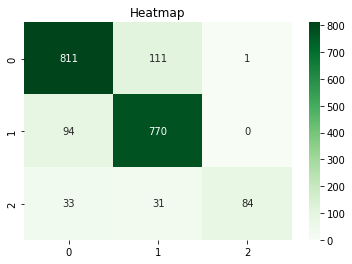

In [ ]:
cm = confusion_matrix(y_test, y_cat_pred)
sns.heatmap(cm, annot = True, cmap = 'Greens', fmt = '.3g')
plt.title("Heatmap")
plt.show()

In [ ]:
print(classification_report(y_test, y_cat_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       923
           1       0.84      0.89      0.87       864
           2       0.99      0.57      0.72       148

    accuracy                           0.86      1935
   macro avg       0.90      0.78      0.82      1935
weighted avg       0.86      0.86      0.86      1935



In [ ]:
report_boot=bootstrap(np.array(X_test), np.array(y_test), tunned_model)

for i in ['accuracy', 'macro avg', 'weighted avg']:
 if i == 'accuracy':
     print("\n\n{:27}: {:.2f} ± {:.2f}".format(i, report_boot[i][0], report_boot[i][1]))
 for j in ['f1-score', 'recall', 'precision']:
   if i != 'accuracy':
     print("{:15}  {:10}: {:.2f} ± {:.2f}".format(i, j, report_boot[i][j][0], report_boot[i][j][1]))

100%|██████████| 250/250 [02:19<00:00,  1.79it/s]



accuracy                   : 0.86 ± 0.01
macro avg        f1-score  : 0.82 ± 0.01
macro avg        recall    : 0.78 ± 0.01
macro avg        precision : 0.90 ± 0.01
weighted avg     f1-score  : 0.86 ± 0.01
weighted avg     recall    : 0.86 ± 0.01
weighted avg     precision : 0.86 ± 0.01


# Usando o modelo Bert-NeuralMind

Um outro modelo pré-treinado que podemos usar do BERT é o modelo da NeuralMind, um centro de pesquisa de inteligência focada em ténicas avançadas de inteligência artificial, que foi treinado para o uso da língua portuguesa em geral.

No Github do modelo [Solving classification problems with CatBoost](https://github.com/neuralmind-ai/portuguese-bert) pode ser encontrado um tutorial com experimentos com o CatBoost.

In [ ]:
from legalnlp.get_premodel import *
get_premodel('neuralmindbase')

True

In [ ]:
# Carregando o modelo da NeuralMind
%%time

bert_model =  BertModel.from_pretrained('/content/bert-base-portuguese-cased_pytorch_checkpoint').to(device)
bert_tokenizer = BertTokenizer.from_pretrained('/content/vocab.txt', do_lower_case=False)

clear_output()


CPU times: user 1.98 s, sys: 366 ms, total: 2.34 s
Wall time: 2.33 s


In [ ]:
# Fazendo a padronização dos textos
wrapper = textwrap.TextWrapper()
data_text = list(data['text'])

for text in range(len(data_text[:4])):
  print(f'{wrapper.fill(data_text[text])}')
  print()

Início da Execução Juntado 0008003-11.2018.8.26.0002 - Cumprimento de
sentença

Ofício Requisitório - Comunicação - Protocolo Eletrônico - DEPRE

Arquivado Provisoriamente aguardando manifestação

Petição Juntada Juntada a petição diversa - Tipo: Petição
Intermediária em Procedimento Comum Cível - Número: 80031 - Protocolo:
FGRU19000140154 - Complemento: autor, expedição de ofício.



In [ ]:
# Aplicando o bert_tokenizer em nosso dataset com um comprimento máximo de 512 tokens
encoded_inputs = bert_tokenizer(data_text, padding=True, truncation=True, max_length=512, return_tensors="pt")

#Agora temos nossos encoded_input em um dicionário com 3 chaves
encoded_inputs.keys()
input_ids = encoded_inputs['input_ids'].to(device)

In [ ]:
# Criando o nosso vetor de features 
features = []

# Aplicando o modelo pré-treinado em cada frase e adicionando-o ao nosso vetor

for i in tqdm(range(len(data_text))):

    with torch.no_grad():
    
      last_hidden_states = bert_model(input_ids[i:(i+1)])[1].cpu().numpy().reshape(-1).tolist()

    features.append(last_hidden_states)


100%|██████████| 6449/6449 [08:34<00:00, 12.53it/s]


In [ ]:
df_features = pd.DataFrame(features)
features_label = pd.concat([df_features, data['encoded']], axis = 1)
features_label.shape

(6449, 769)

In [ ]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(features_label.drop(columns = ['encoded']), features_label['encoded'], random_state = random_seed,test_size = 0.3)

## O Modelo de Boosting: CatBoost

In [ ]:
# criando conjuntos de validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, stratify = y_train, random_state = random_seed)

In [ ]:
tunned_model = CatBoostClassifier(
    loss_function = 'MultiClass',
    random_seed=random_seed,
)

tunned_model.fit(
    X_train, y_train,
    verbose=500,
    eval_set=(X_val, y_val),
    early_stopping_rounds = 100
)

Learning rate set to 0.111046
0:	learn: 1.0018612	test: 1.0035581	best: 1.0035581 (0)	total: 530ms	remaining: 8m 49s
500:	learn: 0.2225151	test: 0.4004028	best: 0.3969985 (420)	total: 4m 8s	remaining: 4m 7s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.396998462
bestIteration = 420

Shrink model to first 421 iterations.


In [ ]:
y_cat_pred = tunned_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_cat_pred)

0.841343669250646

In [ ]:
tunned_model.predict_proba(X_test)[:5]

array([[0.55539233, 0.35241214, 0.09219553],
       [0.22420454, 0.68290792, 0.09288754],
       [0.04273937, 0.95360914, 0.0036515 ],
       [0.97352596, 0.02325789, 0.00321615],
       [0.10581259, 0.75129363, 0.14289378]])

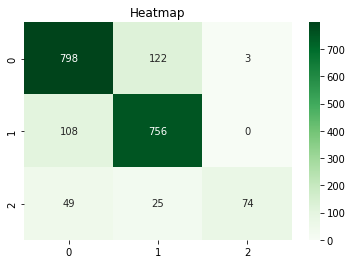

In [ ]:
cm = confusion_matrix(y_test, y_cat_pred)
sns.heatmap(cm, annot = True, cmap = 'Greens', fmt = '.3g')
plt.title("Heatmap")
plt.show()

In [ ]:
print(classification_report(y_test, y_cat_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       923
           1       0.84      0.88      0.86       864
           2       0.96      0.50      0.66       148

    accuracy                           0.84      1935
   macro avg       0.88      0.75      0.79      1935
weighted avg       0.85      0.84      0.84      1935



In [ ]:
report_boot=bootstrap(np.array(X_test), np.array(y_test), tunned_model)

for i in ['accuracy', 'macro avg', 'weighted avg']:
 if i == 'accuracy':
     print("\n\n{:27}: {:.2f} ± {:.2f}".format(i, report_boot[i][0], report_boot[i][1]))
 for j in ['f1-score', 'recall', 'precision']:
   if i != 'accuracy':
     print("{:15}  {:10}: {:.2f} ± {:.2f}".format(i, j, report_boot[i][j][0], report_boot[i][j][1]))

100%|██████████| 250/250 [02:18<00:00,  1.81it/s]



accuracy                   : 0.84 ± 0.01
macro avg        f1-score  : 0.79 ± 0.01
macro avg        recall    : 0.75 ± 0.01
macro avg        precision : 0.88 ± 0.01
weighted avg     f1-score  : 0.84 ± 0.01
weighted avg     recall    : 0.84 ± 0.01
weighted avg     precision : 0.85 ± 0.01


#Referências

[1] Devlin J., Chang M., Lee K., Toutanova K. (2019). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. arxiv: 1810.04805. \\

[2] Vaswani A., Shazeer N., Parmar N., et al. (2017). Attention Is All You Need. arxiv: 1706.03762. \\

[3] Devlin J. Google AI Language. BERT: Pre-training of Deep Bidirectional
Transformers for Language Understanding (Bidirectional Encoder Representations from Transformers). Stanford. https://nlp.stanford.edu/seminar/details/jdevlin.pdf. Acesso em: 04/08/2021. \\

[4] Alammar J., The Illustrated BERT, ELMo, and co. (How NLP Cracked Transfer Learning). https://jalammar.github.io/illustrated-bert/. Acesso em: 04/08/2021. \\

[5] Horev R. (2018). BERT Explained: State of the art language model for NLP. https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270. Acesso em: 04/08/2021. \\

[6] McCormick C., Ryan N. BERT Fine-Tuning Tutorial with PyTorch. https://colab.research.google.com/drive/1pTuQhug6Dhl9XalKB0zUGf4FIdYFlpcX#scrollTo=9cQNvaZ9bnyy. Acesso em: 04/08/2021. \\

[7] McCormick C. Question Answering with a Fine-Tuned BERT. https://mccormickml.com/2020/03/10/question-answering-with-a-fine-tuned-BERT/. Acesso em: 04/08/2021.  